In [25]:
import numpy as np 
import matplotlib.pyplot as plt 

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


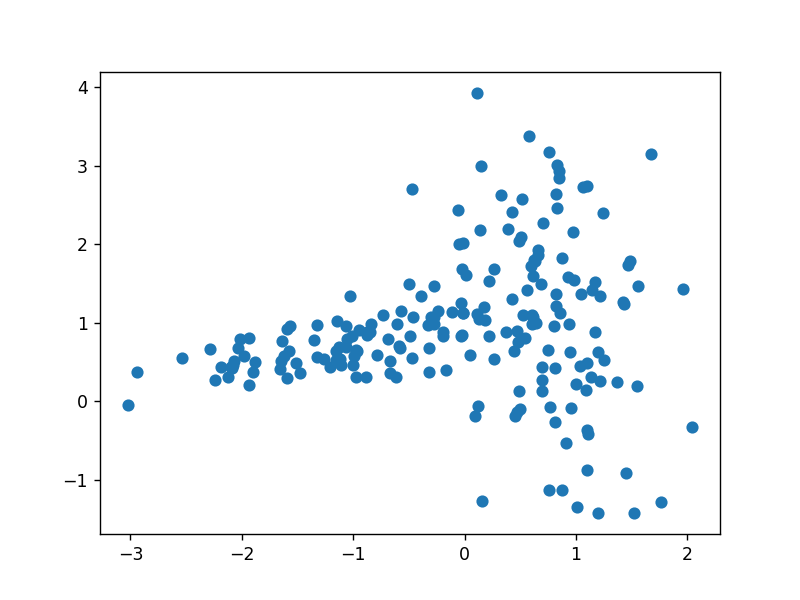

In [27]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

In [28]:
number_samples= 200 
x1,y1 = np.random.randint(0,120,number_samples), np.random.randint(80,200, number_samples)
x2,y2 = np.random.randint(20,200, number_samples), np.random.randint(0,120, number_samples)
x=np.r_[x1,x2]
y=np.r_[y1,y2]

x[:5], y[:5]

(array([77, 15,  3, 18, 42]), array([149, 153,  82, 193, 164]))

<IPython.core.display.Javascript object>


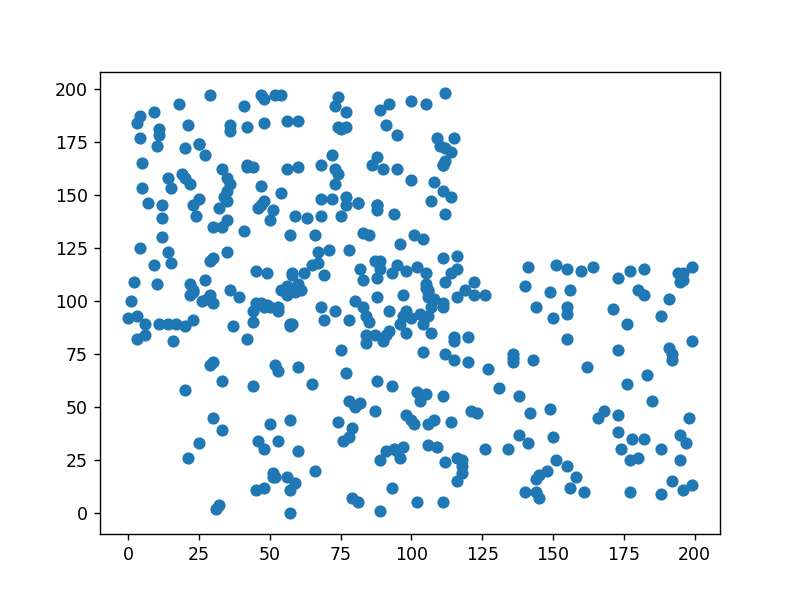

In [29]:
colors = np.array(['green','orange','grey', 'brown'])
def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(x,y)
    else:
        plt.scatter(x,y, c= colors[closest_centroids])

        
plt.figure()
plot_points()

[[ 40  40]
 [120 180]
 [120  20]
 [180 180]]


<IPython.core.display.Javascript object>


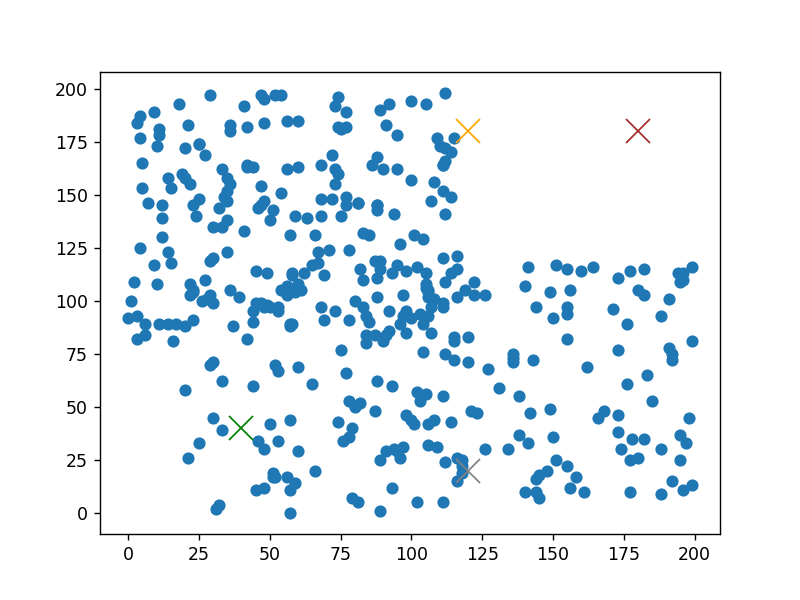

In [31]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed(seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(40,40), (120,180), (120,20), (180,180) ])
        return centroids[:amount]

# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(4, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

def draw_state(centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(closest_centroids)
    plot_centroids(centroids)

draw_state(centroids = centroids, closest_centroids=None)

In [32]:
points = np.array(list((zip(x,y))))
points[:5]

array([[ 77, 149],
       [ 15, 153],
       [  3,  82],
       [ 18, 193],
       [ 42, 164]])

In [33]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(points, centroids)

array([[115.10864433, 115.73245007,  55.97320788, ..., 132.96992141,
        145.4372717 ,  58.30951895],
       [ 53.00943312, 108.415866  , 152.62044424, ...,  83.19254774,
         77.66595136, 135.79396157],
       [135.97793939, 169.45205812, 132.41223508, ...,  92.30926281,
        105.60303026,  34.05877273],
       [107.56393448, 167.19449752, 202.31905496, ...,  78.74642849,
         65.96969001, 157.09869509]])

In [35]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 97.00166646871894


closest_centroids:
 [1 1 0 1 1 0 1 0 1 1 1 0 1 0 2 1 1 1 1 0 1 2 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 2 0 1 0
 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 2 0 1 1 1 0 2 2 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 2 1 1 0 0 1
 0 0 0 1 1 2 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 2 0 1 1 1 1 1 1 0 1 1 0 2 2 2 2 2 2 2 2 0 2 0 0 0 2 2 0 2 2 2 0 1
 2 2 0 1 2 0 0 2 2 2 2 1 2 2 3 2 2 0 0 0 2 2 2 2 0 2 2 2 0 0 2 0 0 1 1 0 2
 3 2 3 2 0 2 2 2 2 2 0 1 3 1 3 2 2 2 2 2 2 3 2 0 1 0 0 0 0 1 1 2 2 2 0 0 2
 3 2 2 2 3 0 0 0 0 2 0 2 0 0 2 0 0 0 0 2 3 2 2 2 0 2 2 2 2 3 2 2 2 3 2 0 2
 0 2 2 0 2 2 0 1 0 0 0 2 2 2 1 1 0 0 2 2 0 2 2 3 3 2 1 2 0 3 2 2 0 2 0 1 1
 2 2 0 2 2 2 0 2 2 0 0 2 2 3 2 3 0 2 2 0 2 0 1 2 0 0 2 3 3 2]
Cost= 58.98638637483391


<IPython.core.display.Javascript object>


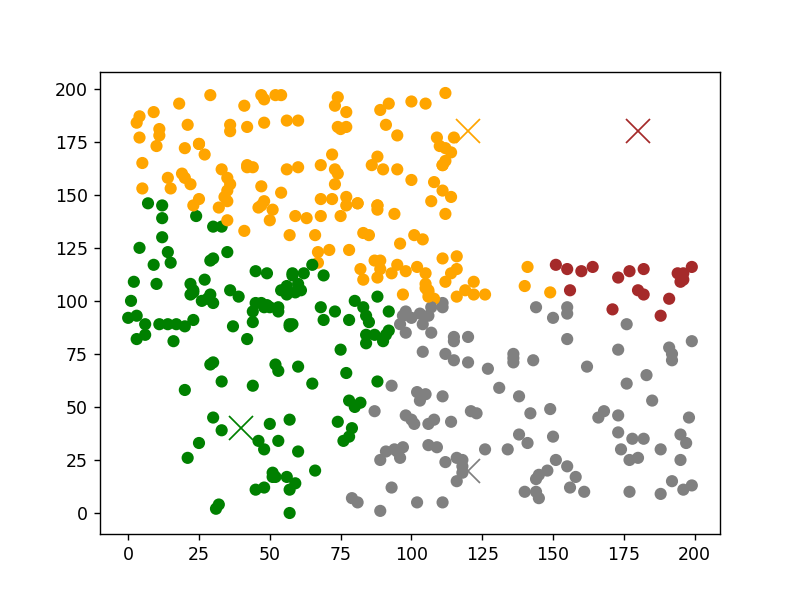

In [36]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)


New centroids: [array([46.08130081, 81.45528455]), array([ 71.3537415 , 150.97959184]), array([135.70535714,  47.97321429]), array([178.33333333, 109.22222222])]
Cost= 39.59647765873052


<IPython.core.display.Javascript object>


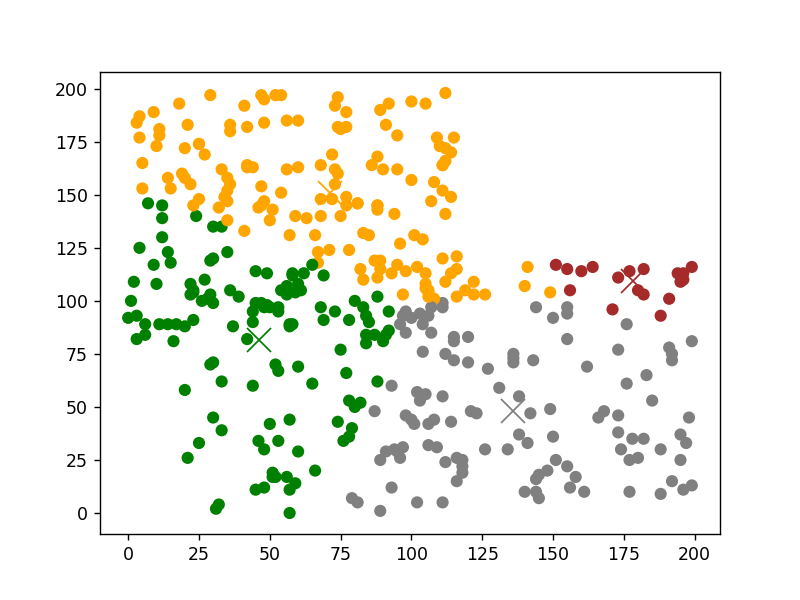

In [37]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

<IPython.core.display.Javascript object>


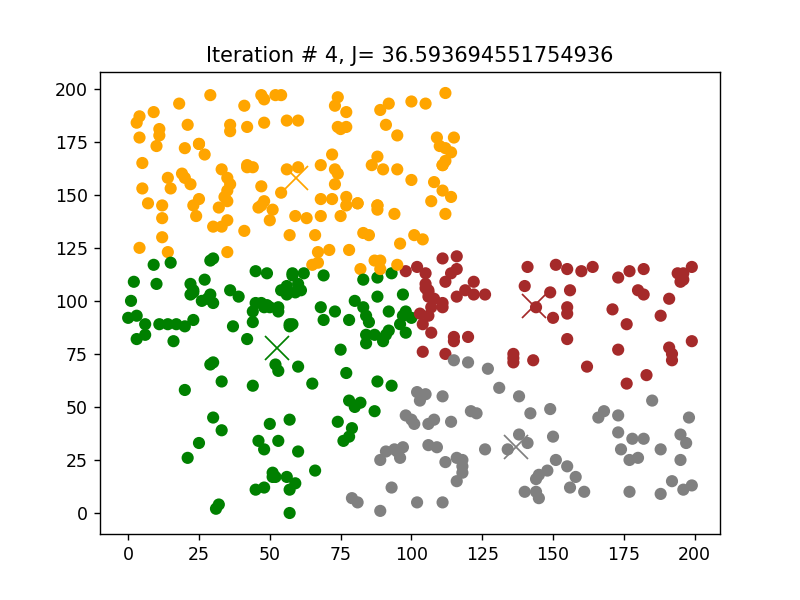

In [38]:
from matplotlib import animation
fig, ax = plt.subplots()


centroids = init_centroids(
    is_random = False, 
    amount =4, 
    points= points,
    seed = 2)
# closest_centroids= compute_closest_centroids(centroids) 

J_hist = [-1] # init -1 to let compare with first value 

def update(curr):

    ax.clear()

    global closest_centroids
    global centroids
    global J_hist

    ax.scatter(x,y, c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        ax.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 


    closest_centroids = compute_closest_centroids(centroids) 
    centroids = compute_means(centroids, closest_centroids)
    
    new_J = J(centroids, closest_centroids)
    if J_hist[-1] == new_J:
        a.event_source.stop()
        
    J_hist.append(J(centroids, closest_centroids))
#     ax.plot(np.random.rand(10)) # use to test annimation is working 
    plt.title('Iteration # {}, J= {}'.format(curr, new_J)) # need to add it once more since it disappears with ax.clear()

a = animation.FuncAnimation(fig, update, interval=2000) # Note: you need to assign this in order to run the animation if you believe it necessary 

<IPython.core.display.Javascript object>


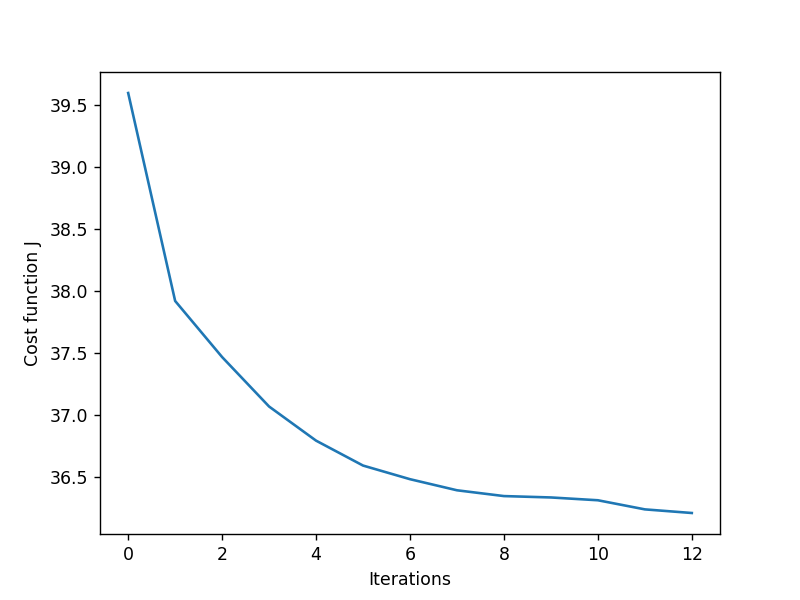

Text(0, 0.5, 'Cost function J')

In [39]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

centroids= init_centroids(amount = 4, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')

<IPython.core.display.Javascript object>


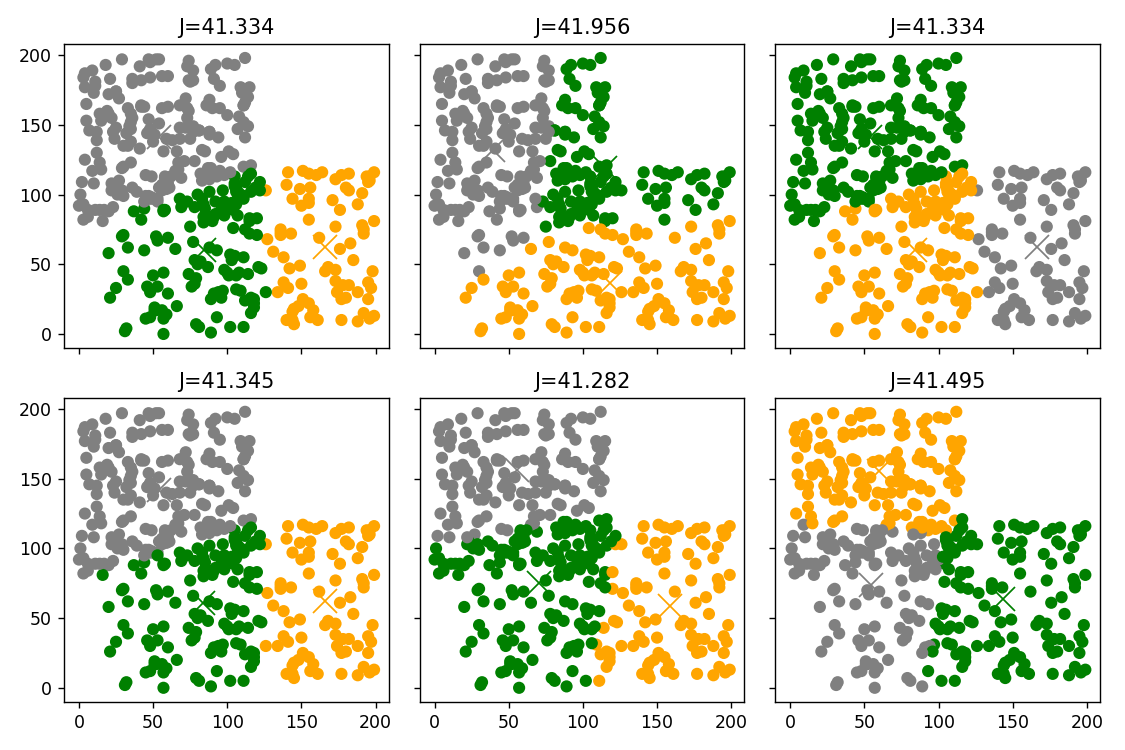

In [40]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize= (9,6))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for index_plot in range (6):
    centroids = init_centroids(is_random = True, amount =3, points= points,seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    print ()
    axes[index_plot].scatter(x,y, c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        axes[index_plot].plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    plt.sca(axes[index_plot])
    plt.title ('J={:.3f}'.format(J_hist[-1]))

plt.tight_layout()


In [42]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 3, points= points, seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure()
plt.scatter(x,y, c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))

KeyboardInterrupt: 